<a href="https://colab.research.google.com/github/artemkozlenkov/hm/blob/master/notebooks/Fourier_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One dimensional signals 
    
Signals described to be the functions with various numbers of independent variables. The number of these variables defines the signal dimension. In particular 1 dimensional signals (1D) defined by the one independent variable in a function, typically over time domain x(t). 

The examples of a 1D signal could be an audio signal(music, speech, sound), a voltage signal in a circuit, or the speed of a car. 

The signals may be of two basic types: Continuous and Discrete. 

Majority of natural based signals are continuous in their nature however for them to be properly processed the signals have to be discretized, meaning transformed from continuous representation into discrete. This process is called sampling.  
    
Alan Oppenheim, Signals and Systems (1996)
1. 1 CONTINUOUS-TIME AND DISCRETE-TIME SIGNALS
1 . 1 . 1 Examples and Mathematical Representation


# Nyquist Theorem

# Intro to a goal that we are trying to achieve

# Plotting original sine waves

The initial signal consists of the sum of two periodic simple sine functions of 
different periodicity: 10 Hz and 20 Hz.

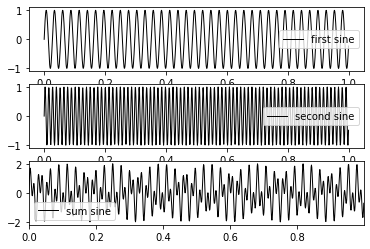

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dtype = 0.001
timeInterval = np.arange(0,1, dtype)

freq1 = 37
freq2 = 81
sine1 = np.sin(2*np.pi*freq1*timeInterval)
sine2 = np.sin(2*np.pi*freq2*timeInterval)
sineSum = sine1 + sine2

fig,axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(timeInterval,sine1, color='black', linewidth=1, label='first sine')
plt.legend()
plt.sca(axs[1])
plt.plot(timeInterval,sine2, color='black', linewidth=1, label='second sine')
plt.legend()
plt.sca(axs[2])
plt.plot(timeInterval,sineSum, color='black', linewidth=1, label='sum sine')
plt.legend()
plt.xlim(timeInterval[0], timeInterval[-1])
plt.show()

# Gaussian noise
Then the Gaussian noise is added to the summarized signal `sineSum` in order to get a distorted signal. 

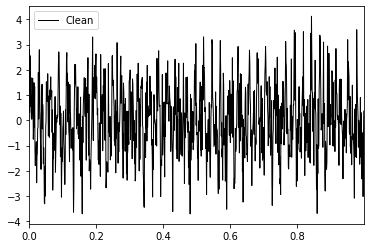

In [3]:
noise = np.random.randn(len(timeInterval))
signalNoise = sineSum + noise

plt.plot(timeInterval, signalNoise, color='k', linewidth=1, label='Clean')
plt.xlim(timeInterval[0], timeInterval[-1])
plt.legend()
plt.show()

This noise then will be attempted to be filtered out and restored to it's original denoised state. 

# Fast Fourier Transform (FFT)

To be able to generate Fourier Series from a finite range the Discrete Fourier Transformation algorithm should be used. In order to process large data sets in a more efficient generaly used a Fast Fourier Algorithm.

Let's generate a Fourier series from the distorted signal `signalNoise` 
using the python method for Fast Fourier Transform.

And confirm that the Fourier Series indeed were generated by examining the first 10 results from the variable **fftSignalNoise**

In [4]:
fftSignalNoise = np.fft.fft(signalNoise, len(timeInterval))

i = 0
for line in fftSignalNoise:
    if (10 == i):
        break
    print(line)
    i += 1

(6.495236629927319+0j)
(13.991310205433802+14.886060961658314j)
(-45.01464201991089+33.950232386925876j)
(-5.0825057940902845+10.708182821458195j)
(-7.880695226484354+34.44991992460061j)
(-11.23775809253704-23.587354477207153j)
(9.548887662750936-19.446151426387846j)
(-7.121981122544973+17.106193157460073j)
(-22.628363342324096-39.41781341417666j)
(-11.585093556262452+19.902437315531394j)


# Power Spectrum Density

There's a need to calculate a **spectral density** which is a represenation of power(intensity) of a given function at frequency domain for the given interval between **w** and **w + delta w**



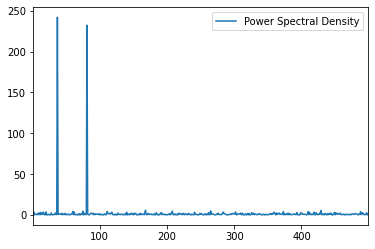

In [5]:
interval = len(timeInterval)

spectrum = fftSignalNoise * np.conj(fftSignalNoise)/interval
frequencies = (1/(dtype*interval))* np.arange(interval)

L = np.arange(1, np.floor(interval/2), dtype='int')

plt.plot(frequencies[L], np.real(spectrum[L]), label='Power Spectral Density')
plt.xlim(frequencies[L[0]], frequencies[L[-1]])
plt.legend()
plt.show()

# Power Spectral Density Filtering

In order to get rid of unnecessary noise and focus on the valueable data only it's necessary to set all the values of some certain level to zero. 

This can be achieved by evaluating the **psd** values and comparing them to the given level and then setting only matching values back in to the matrix. 

In [7]:
filtered_spectrum_ids = spectrum > 100
filtered_signal = fftSignalNoise * filtered_spectrum_ids

for i,v in enumerate(filtered_spectrum_ids):
  if v == True:
    print(spectrum[i])




(241.9369001236315+0j)
(232.25841613715397+0j)
(232.25841613715397+0j)
(241.9369001236315+0j)
